In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 1. Bisection


One of the most common algorithms for numerical root-finding is *bisection*.

To understand the idea, recall the well-known game where:

- Player A thinks of a secret number between 1 and 100  
- Player B asks if it’s less than 50  
  
  - If yes, B asks if it’s less than 25  
  - If no, B asks if it’s less than 75  
  

And so on.

This is bisection, a relative of [binary search](https://en.wikipedia.org/wiki/Binary_search_algorithm). It works for all sufficiently well behaved increasing continuous functions with $ f(a) < 0 < f(b) $. 

Write an implementation of the bisection algorith, `bisect(f, lower, upper, tol)` which, given a function `f`, a lower bound `lower` and an upper bound `upper` finds the point `x` where `f(x) = 0`. The parameter `tol` is a numerical tolerance, you should stop once your step size is smaller than `tol`.


Use it to minimize the function:

$$
f(x) = \sin(4 (x - 1/4)) + x + x^{20} - 1 \tag{2}
$$

in python: `lambda x: np.sin(4 * (x - 1/4)) + x + x**20 - 1`

The value where f(x) = 0 should be around `0.408`

In [2]:
def bisect(f, lower, upper, tol):
    for i in range(1, tol+1):
        m = (lower+upper)/2
        if f(lower)*f(m) < 0:
            lower = lower
            upper = m
        elif f(upper)*f(m) < 0:
            lower = m
            upper = upper
        elif f(m) == 0:
            return m
    return (lower+upper)/2

f = lambda x: np.sin(4 * (x - 1/4)) + x + x**20 - 1
bisect(f, 0, 100, 20)

0.40831565856933594

# 1.2 (stretch) Recursive Bisect

Write a recursive version of the bisection algorithm

# 2.1 Movies Regression

Write the best linear regression model you can on the [Movies Dataset](https://www.kaggle.com/rounakbanik/the-movies-dataset?select=ratings.csv) to predict the profitability of a movie (revenue - budget). Maintain the interpretability of the model.

Few notes:

1. Clean your data! Movies where the budget or revenue are invalid should be thrown out

2. Be creative with feature engineering. You can include processing to one-hot encode the type of movie, etc.

3. The model should be useful for someone **who is thinking about making a movie**. So features like the popularity can't be used. You could, however, use the ratings to figure out if making "good" or "oscar bait" movies is a profitable strategy.

In [3]:
movies_url = {
"movies_metadata": "1RLvh6rhzYiDDjPaudDgyS9LmqjbKH-wh",
"keywords": "1YLOIxb-EPC_7QpkmRqkq9E6j7iqmoEh3",
"ratings": "1_5HNurSOMnU0JIcXBJ5mv1NaXCx9oCVG",
"credits": "1bX9othXfLu5NZbVZtIPGV5Hbn8b5URPf",
"ratings_small": "1fCWT69efrj4Oxdm8ZNoTeSahCOy6_u6w",
"links_small": "1fh6pS7XuNgnZk2J3EmYk_9jO_Au_6C15",
"links": "1hWUSMo_GwkfmhehKqs8Rs6mWIauklkbP",
}

def read_gdrive(url):
    """
    Reads file from Google Drive sharing link
    """
    path = 'https://drive.google.com/uc?export=download&id='+url
    return pd.read_csv(path)

movies = read_gdrive(movies_url["movies_metadata"])
ratings = read_gdrive(movies_url["ratings_small"])
ratings = ratings.rename(columns={'movieId': 'id'})

movies = movies.drop(movies[movies.id.str.contains("-")].index)
movies.id = movies.id.astype(str).astype(int)
movies = movies.merge(ratings, on='id')  ##merge ratings into movies

movies = movies.dropna(subset=['budget', 'revenue'])  ##drop all NaNs
movies = movies.drop(movies[movies.budget.str.contains("jpg")].index)  ##drop all non-numeric strings
movies.budget = movies.budget.astype(str).astype(float)  ##convert budget to float, revenue is already float
movies = movies.drop(movies[(movies.budget == 0) | (movies.revenue == 0)].index)  ##drop all cases where revenue/budget = 0
movies['profit'] = (movies.revenue - movies.budget)
movies

C:\Users\gaia_\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3263: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,status,tagline,title,video,vote_average,vote_count,userId,rating,timestamp,profit
0,False,NaN,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,23,3.5,1148721092,127436818.0
1,False,NaN,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,102,4.0,956598942,127436818.0
2,False,NaN,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,232,2.0,955092697,127436818.0
3,False,NaN,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,242,5.0,956688825,127436818.0
4,False,NaN,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,263,3.0,1117846575,127436818.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44244,False,NaN,3250000.0,"[{'id': 18, 'name': 'Drama'}]",http://www.localcolormovie.com/,2324,tt0472126,en,Local Color,A successful artist looks back with loving mem...,...,Released,NaN,Local Color,False,6.1,8.0,648,4.5,1175726033,-3217212.0
44245,False,NaN,3250000.0,"[{'id': 18, 'name': 'Drama'}]",http://www.localcolormovie.com/,2324,tt0472126,en,Local Color,A successful artist looks back with loving mem...,...,Released,NaN,Local Color,False,6.1,8.0,668,5.0,993613359,-3217212.0
44246,False,NaN,3250000.0,"[{'id': 18, 'name': 'Drama'}]",http://www.localcolormovie.com/,2324,tt0472126,en,Local Color,A successful artist looks back with loving mem...,...,Released,NaN,Local Color,False,6.1,8.0,671,4.0,1063500858,-3217212.0
44905,False,NaN,5300000.0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,8453,tt0439662,hi,Fanaa,Zooni Ali Beg (Kajol) is a blind Kashmiri girl...,...,Released,Destroyed in love...,Fanaa,False,6.7,53.0,652,4.0,1442083596,16875908.0


In [4]:
movies.groupby(by=['id']).mean()

,budget,revenue,runtime,vote_average,vote_count,userId,rating,timestamp,profit
id,,,,,,,,,
5,4000000.0,4300000.0,98.0,6.5,539.0,320.785714,3.267857,9.967201e+08,300000.0
11,11000000.0,775398007.0,121.0,8.1,6778.0,353.378049,3.689024,9.895801e+08,764398007.0
12,94000000.0,940335536.0,100.0,7.6,6292.0,347.277778,2.861111,9.934647e+08,846335536.0
13,55000000.0,677945399.0,142.0,8.2,8147.0,409.625000,3.937500,1.121448e+09,622945399.0
14,15000000.0,356296601.0,122.0,7.9,3438.0,332.258065,3.451613,9.259930e+08,341296601.0
...,...,...,...,...,...,...,...,...,...
89492,35000000.0,88058786.0,134.0,5.6,909.0,345.812500,3.781250,1.406416e+09,53058786.0
103731,10000000.0,21587700.0,130.0,7.0,1080.0,652.000000,5.000000,1.439587e+09,11587700.0
105254,6900000.0,6530000.0,115.0,6.0,3.0,624.000000,3.000000,1.411244e+09,-370000.0


In [5]:
movies.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'userId', 'rating', 'timestamp',
       'profit'],
      dtype='object')

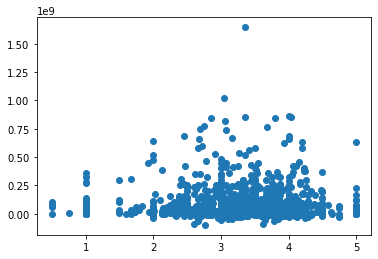

The maximum possible profit is: 1.645034e+09
Based on the prediction, a 4.5 star rating movies nets: [1.16030279e+08]


In [6]:
x = np.asarray(movies.groupby(by=['id']).mean().rating)
y = np.asarray(movies.groupby(by=['id']).mean().profit)

est = sm.OLS(y, x).fit()

fig, ax = plt.subplots()
ax.scatter(x, y)
plt.show()
print("The maximum possible profit is: {:e}".format(max(y)))
print("Based on the prediction, a 4.5 star rating movies nets:",est.predict(4.5))

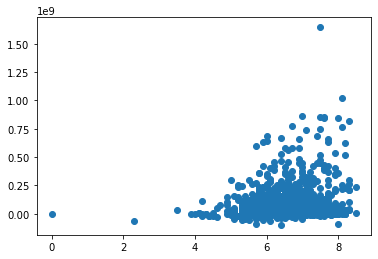

The maximum possible profit is: 1.645034e+09
Based on the prediction, a 8.0 vote-average movie nets: [1.11039789e+08]


In [7]:
x = np.asarray(movies.groupby(by=['id']).mean().vote_average)
y = np.asarray(movies.groupby(by=['id']).mean().profit)

est = sm.OLS(y, x).fit()

fig, ax = plt.subplots()
ax.scatter(x, y)
plt.show()
print("The maximum possible profit is: {:e}".format(max(y)))
print("Based on the prediction, a 8.0 vote-average movie nets:",est.predict(8.0))

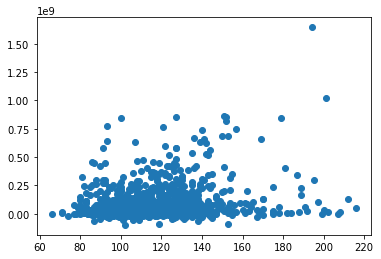

The maximum possible profit is: 1.645034e+09
Based on the prediction, a long length movie nets: [99232869.28899972]


In [8]:
x = np.asarray(movies.groupby(by=['id']).mean().runtime)
y = np.asarray(movies.groupby(by=['id']).mean().profit)

est = sm.OLS(y, x).fit()

fig, ax = plt.subplots()
ax.scatter(x, y)
plt.show()
print("The maximum possible profit is: {:e}".format(max(y)))

"""
Arbitrarily assigned Runtime limits:
Short: up to 60 minutes
Medium: 60 minutes to 120 minutes
Long: upwards of 120 minutes
"""

print("Based on the prediction, a long length movie nets:",est.predict(120))

<font color='green'>Based on the 3 factors chosen above; Ratings, Vote Averages, and Run Time. There's no reason to suggest that a well-rated movie (e.g. oscar winning 5/5 rating) would fare well in terms of profits. As shown in the ratings and run time charts, a moderate length movie with a mid-tier rating (3.0-4.0) seems to fare the best for profits.</font>

# 2.2 Movies Manual Regression

Use your `X` and `y` matrix from 2.1 to calculate the linear regression yourself using the normal equation $(X^T X)^{-1}X^Ty$.

Verify that the coefficients are the same.

85516120.48472893


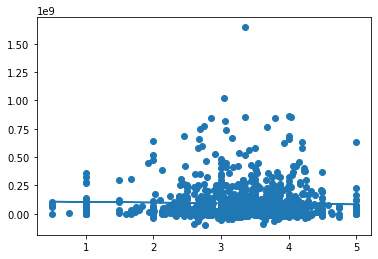

In [9]:
x = np.asarray(movies.groupby(by=['id']).mean().rating)
y = np.asarray(movies.groupby(by=['id']).mean().profit)

x_bias = np.ones((len(x),1))
x_prime = np.reshape(x, (len(x),1))
x_prime = np.append(x_bias,x_prime,axis=1)
x_transpose = np.transpose(x_prime)
x_transpose_dot_x = x_transpose.dot(x_prime)
temp_1 = np.linalg.inv(x_transpose_dot_x)
temp_2 = x_transpose.dot(y)
θ = temp_1.dot(temp_2)
intercept = θ[0]
slope = θ[1]

plt.scatter(x,y)
plt.plot(x,slope*x+intercept)
print(slope*4.5+intercept)

# 2.3 Movies gradient descent regression

Use your `X` and `y` matrix from 2.1 to calculate the linear regression yourself using **gradient descent**. 

Hint: use `scipy.optimize` and remember we're finding the $\beta$ that minimizes the squared loss function of linear regression: $f(\beta) = (\beta X - y)^2$. This will look like part 3 of this lecture.

Verify your coefficients are similar to the ones in 2.1 and 2.2. They won't necessarily be exactly the same, but should be roughly similar.

In [10]:
X = np.asarray(movies.groupby(by=['id']).mean().rating)
Y = np.asarray(movies.groupby(by=['id']).mean().profit)

m = 0
c = 0

L = 0.0001 
epochs = 1000 

n = float(len(X))

for i in range(epochs): 
    Y_pred = m*X + c 
    D_m = (-2/n) * sum(X * (Y - Y_pred)) 
    D_c = (-2/n) * sum(Y - Y_pred) 
    m = m - L * D_m
    c = c - L * D_c
    
print(m*4.5 + c)

105481753.91724366
